In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm as normal, binom
import bplot as bp
from scipy.optimize import minimize
from scipy.special import loggamma

# 21 October, 2019

In [50]:
def bootstrap(data, R, fun, confidence=95):
    N = data.size
    thetas = np.full(R, np.nan)
    for r in range(R):
        idx = np.random.choice(N, N, replace=True)
        thetas[r] = fun(data[idx])
    return np.percentile(thetas, [(100-confidence)/2, (100-confidence)/2 + confidence])

In [12]:
X = np.random.normal(np.pi, 2, size=99)
N = X.size
print(f"Median: {np.median(X)}")
R = 1001

print(f"Interval of 95% confidence: {bootstrap(X,R,np.median)}")

Median: 2.291636691714812
Interval of 95% confidence: [2.0767195  3.04416565]


The confidence of 95% means that 95% of all confidence intervals (assuming we have an infinite amount of them) will contain the true population parameter, and 5% of them will not

Percentage of bootstrapped intervals that contained the true population parameter: 0.95


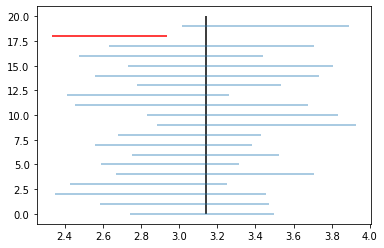

In [51]:
S = 20 # We have S friends
R = 1001
count = 0
bp.line_v(x=np.pi, ymin=0, ymax=S, color="black")
CI = np.full((S,2),np.nan)
for s in range(S):
    X = np.random.normal(np.pi, 2, size=99)
    N = X.size
    CI[s, :]=bootstrap(X, R, np.median)
    if CI[s, 0] < np.pi and CI[s, 1] > np.pi: # If the confidence interval contains the true population parameter
        count += 1
        bp.line_h(y=s, xmin=CI[s,0], xmax = CI[s,1], alpha = 0.5)
    else: # The confidence interval does not contain the true population parameter
        bp.line_h(y=s, xmin=CI[s, 0], xmax=CI[s,1], color = "red")
print(f"Percentage of bootstrapped intervals that contained the true population parameter: {np.round(count/S, 2)}")